<a href="https://colab.research.google.com/github/enunezs/IntroAI_Assignment/blob/main/Worksheet_Week_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entropy Based Decision Tree Classification

In this question we use the Wisconsin Breast Cancer data set to explore decision tree learning in Python.

In [ ]:
from sklearn.datasets import load_breast_cancer 
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from matplotlib.pylab import rcParams
import numpy as np

Start off by importing the Wisconsin Breast Cancer dataset (`load_breast_cancer()`) and split into training and test sets.

In [ ]:
breast_cancer = load_breast_cancer() 
# TODO
x = breast_cancer.data
y = breast_cancer.target

x_training, x_test, y_training, y_test = train_test_split(x, y, test_size = 0.2, random_state = 314 )



Instantiate a decision tree classifier 
(https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) using entropy as the criterion to select attributes (`criterion=entropy`). Fit the classifier and make a prediction on the training and on the test data. Calculate accuracy for the training set and the test set.

In [ ]:
# TODO
dtc = tree.DecisionTreeClassifier(criterion='entropy')

dtc.fit(x_training,y_training)
y_pred = dtc.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_test = accuracy_score(y_test, y_pred)
print(accuracy_test)


0.9385964912280702


One of the advantages of decision tree classifiers is that they are very interpretable. This is because the tree corresponds to a set of if-then rules identifying the class of an input given various constraints on the features. The structure of these rules can be seen by visualising the tree. You can use the following commands to extract a text-based representation.

In [ ]:
from sklearn.tree import export_text 
features = breast_cancer['feature_names'].tolist()
r = export_text(dtc,feature_names=features) 
print(r)

|--- worst perimeter <= 105.15
|   |--- worst concave points <= 0.16
|   |   |--- mean texture <= 21.32
|   |   |   |--- area error <= 46.93
|   |   |   |   |--- class: 1
|   |   |   |--- area error >  46.93
|   |   |   |   |--- concave points error <= 0.02
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- concave points error >  0.02
|   |   |   |   |   |--- class: 1
|   |   |--- mean texture >  21.32
|   |   |   |--- symmetry error <= 0.02
|   |   |   |   |--- smoothness error <= 0.01
|   |   |   |   |   |--- mean texture <= 21.94
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- mean texture >  21.94
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- smoothness error >  0.01
|   |   |   |   |   |--- texture error <= 1.15
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- texture error >  1.15
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- symmetry error >  0.02
|   |   |   |   |--- class: 1
|   |--- worst concave points >  0.16
|   |   |

Alternatively, we can also obtain a graphical representation. In the following we import the actual feature and class names for the Wisconsin data set which are then included as parameters in the ”plot-tree” command. The default will simply be to allocate numbers to features and classes. The first command resizes the figure to attempt to make the decision tree more readable.

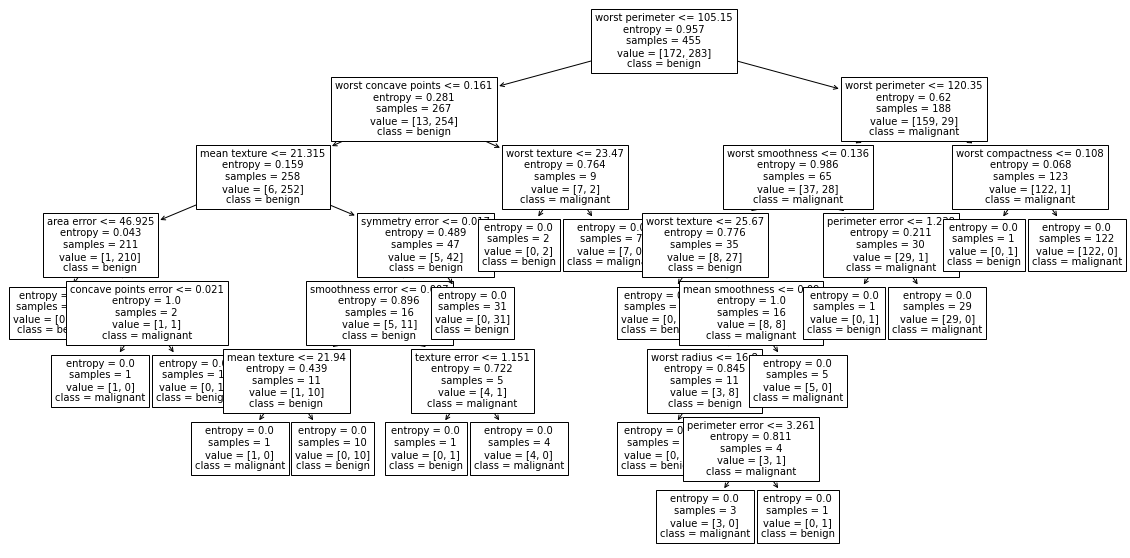

In [ ]:
rcParams['figure.figsize'] = [20, 10]
classes = breast_cancer.target_names 
tree.plot_tree(dtc, feature_names=features, class_names=classes, fontsize=10)
plt.show()


Have a go at writing some of the branches of the tree in the form of if-then rules

PENDING

# Decision Trees Based on Gini Impurity
The Gini impurity can be used as an alternative to entropy when choosing on which attributes to split. If there are k classes and in a given branch B the proportion of training data of class i is pi then the Gini impurity for that branch is given by
$$ G(B) = 1 - \sum_{i=1}^k p_i^2 $$
We can use also use the Gini impurity to generate decision trees in sklearn. Instantiate a decision tree classifier using Gini impurity and plot it. How does the structure of the two trees differ?

0.9736842105263158


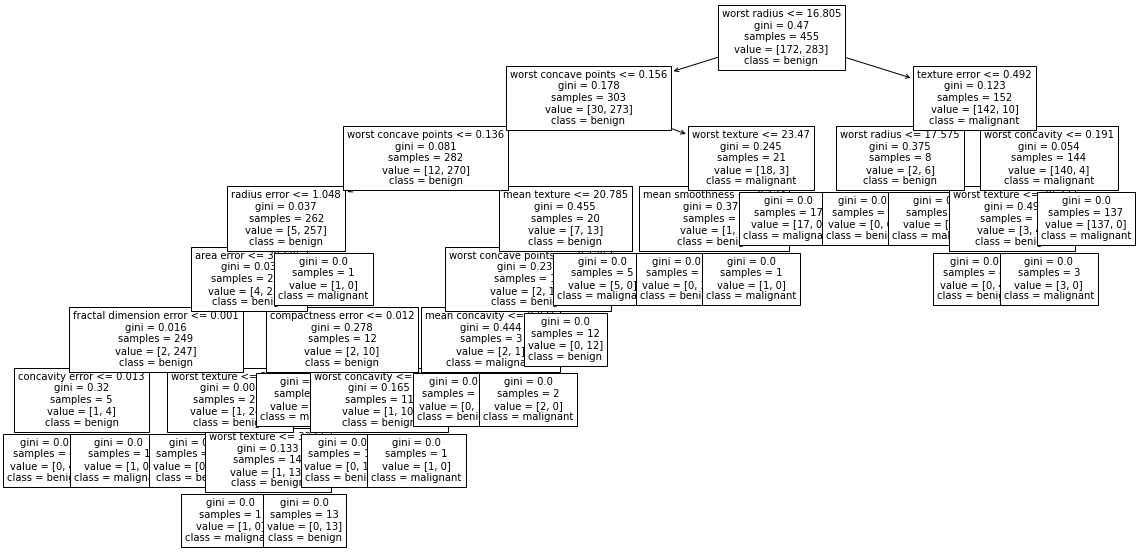

In [ ]:
# TODO
dtc = tree.DecisionTreeClassifier(criterion='gini')

dtc.fit(x_training,y_training)
y_pred = dtc.predict(x_test)

accuracy_test = accuracy_score(y_test, y_pred)
print(accuracy_test)

features = breast_cancer['feature_names'].tolist()
r = export_text(dtc,feature_names=features) 
#print(r)
rcParams['figure.figsize'] = [20, 10]
classes = breast_cancer.target_names 
tree.plot_tree(dtc, feature_names=features, class_names=classes, fontsize=10)
plt.show()

# Constraining Decision Trees

There are various constraints that we can put on decision tree learning which can affect overfitting and underfitting of the data. Perhaps the simplest is restricting the depth of the tree. Instantiate a decision tree classifier using entropy to select attributes and setting the parameter `max_depth` to 2. Fit it to the data and compare the accuracy with the full decision tree.

0.9473684210526315


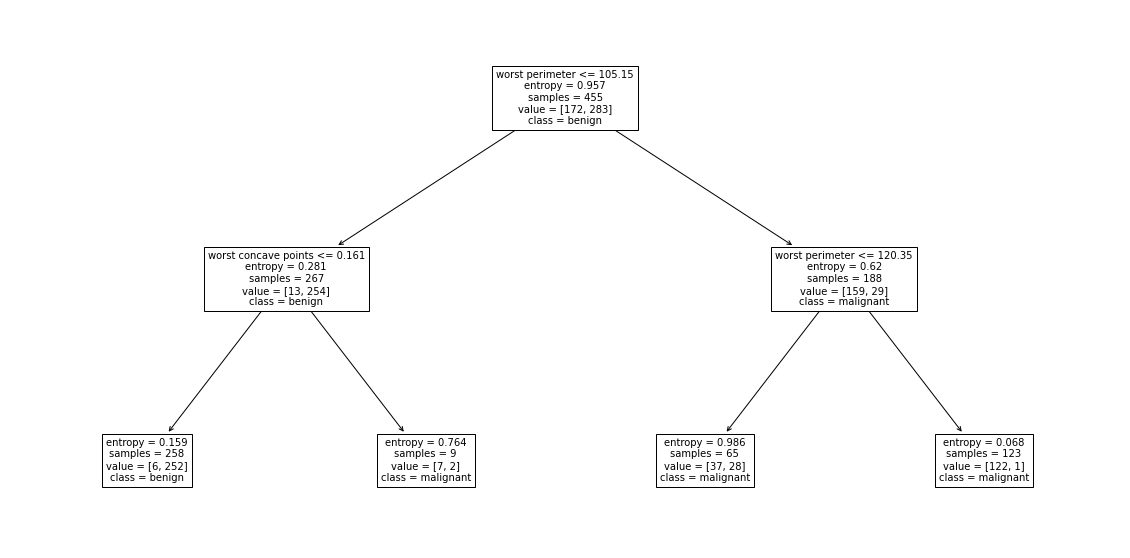

In [ ]:
# TODO
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)

dtc.fit(x_training,y_training)
y_pred = dtc.predict(x_test)
accuracy_test = accuracy_score(y_test, y_pred)
print(accuracy_test)

features = breast_cancer['feature_names'].tolist()
r = export_text(dtc,feature_names=features) 
#print(r)
rcParams['figure.figsize'] = [20, 10]
classes = breast_cancer.target_names 
tree.plot_tree(dtc, feature_names=features, class_names=classes, fontsize=10)
plt.show()



In [ ]:
# TODO
#Better accuracy than no max_depth tree!
#0.947 vs 0.921


Another approach is to restrict the number of leaf nodes. In this case the tree is grown in a best first manner where best nodes are defined using relative reduction in impurity.

Try restricting the maximum number of leaf nodes (`max_leaf_nodes`) to 5.

0.9649122807017544


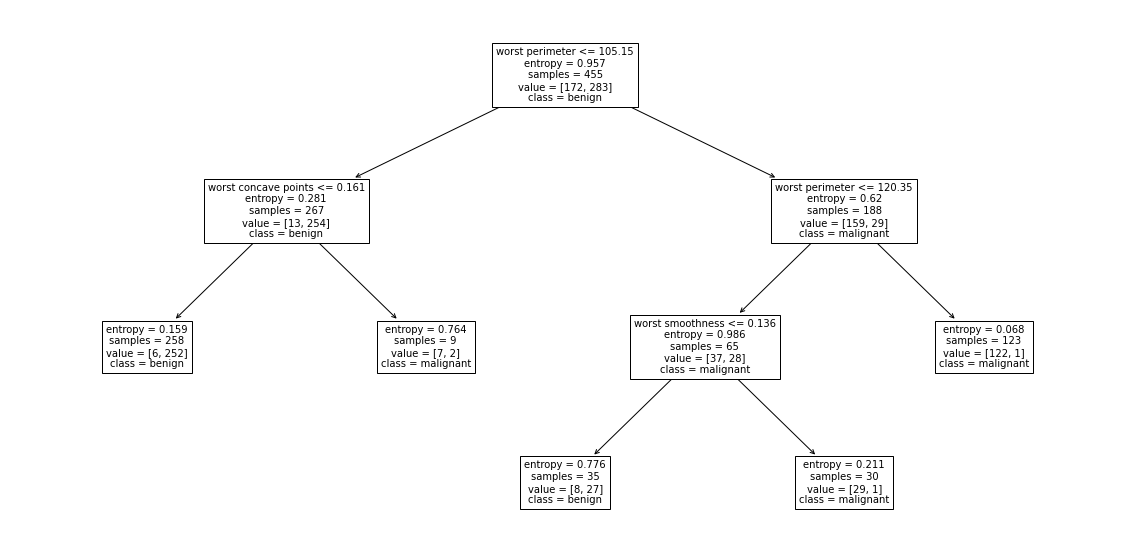

In [ ]:
# TODO
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5)

dtc.fit(x_training,y_training)
y_pred = dtc.predict(x_test)
accuracy_test = accuracy_score(y_test, y_pred)
print(accuracy_test)

features = breast_cancer['feature_names'].tolist()
r = export_text(dtc,feature_names=features) 
#print(r)
rcParams['figure.figsize'] = [20, 10]
classes = breast_cancer.target_names 
tree.plot_tree(dtc, feature_names=features, class_names=classes, fontsize=10)
plt.show()


Yet another alternative is to set a threshold on impurity reduction. This means that a node will only split if the expected reduction in impurity is above a certain threshold. 

Look at what happens if you set `min_impurity_decrease` to 0.02

0.9736842105263158


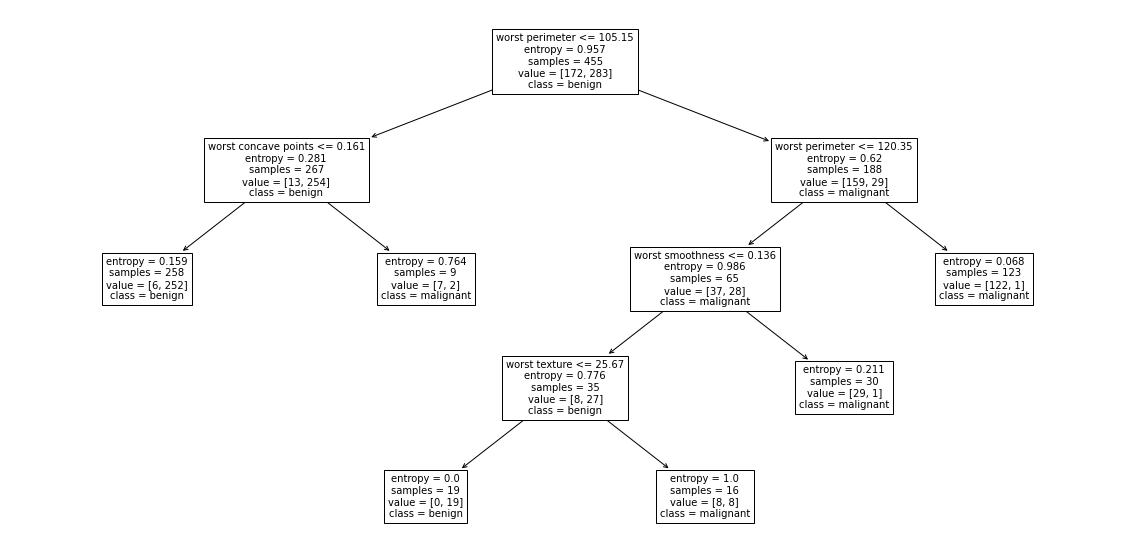

In [ ]:
# TODO
dtc = tree.DecisionTreeClassifier(criterion='entropy', min_impurity_decrease =0.02)

dtc.fit(x_training,y_training)
y_pred = dtc.predict(x_test)
accuracy_test = accuracy_score(y_test, y_pred)
print(accuracy_test)

features = breast_cancer['feature_names'].tolist()
r = export_text(dtc,feature_names=features) 
#print(r)
rcParams['figure.figsize'] = [20, 10]
classes = breast_cancer.target_names 
tree.plot_tree(dtc, feature_names=features, class_names=classes, fontsize=10)
plt.show()


By investigating all of these different constraints comment on which are the most concise three that you can find which have good generalisation performance.

# Decision Trees for Regression

We can also learn trees for regression problems. In this case each leaf node has an associated real value for the function along that branch. Splitting of nodes is then based on achieving an overall reduction in mean-squared error (rather than on impurity reduction).

We generate data for a simple regression problem where y = cos(x) but where there is noise associated with the y values recorded.

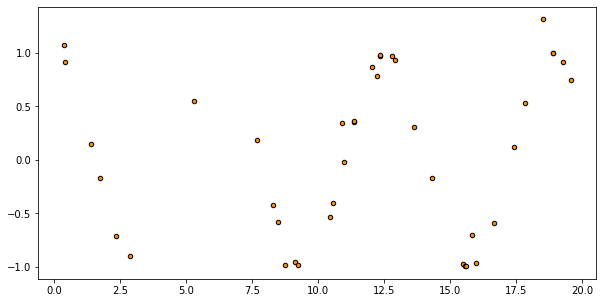

In [ ]:
np.random.seed(0)
X = np.sort(20 * np.random.rand(40, 1), axis=0) 
y = np.cos(X).ravel()
y[::5] += 0.5 - np.random.rand(8)

rcParams['figure.figsize'] = [10, 5]
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
c="darkorange", label="data")
plt.show()

We can fit a regression tree using DecisionTreeRegressor as follows:

In [ ]:
from sklearn.tree import DecisionTreeRegressor
rt = DecisionTreeRegressor(criterion='mse',max_depth=7, min_samples_split=3, min_samples_leaf=3)
model=rt.fit(X, y) 
ypred=model.predict(X)

We can visualize the tree and see its accuracy as follows. Try experimenting with different max depth values and see how it impacts on performance.

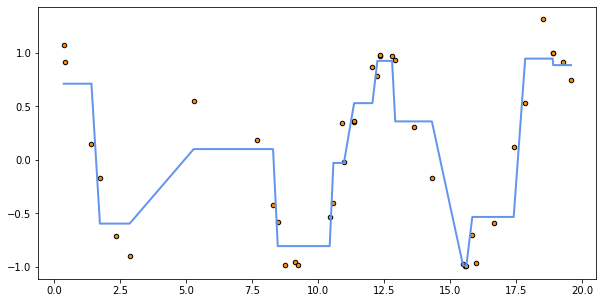

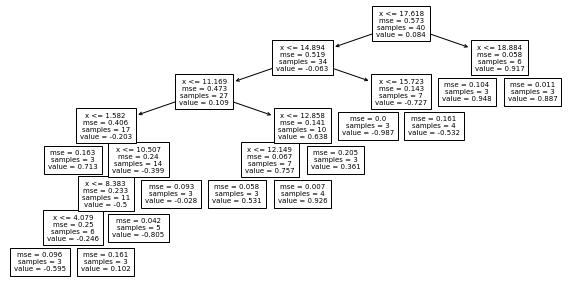

In [ ]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
c="darkorange", label="data")
plt.plot(X, ypred, color="cornflowerblue",label="max_depth=2",
   linewidth=2)
plt.show()
plt.figure() 
tree.plot_tree(model,feature_names=['x','y'],fontsize=7)
plt.show()

We can also use this approach to learn a regression tree for the diabetes data set from sklearn. Instantiate a regression tree on the diabetes dataset with maximum depth 4. Split the data into a training and a test set. Fit the model on the training set and calculate the mean squared error on the test set. 

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_diabetes


diabetes_data = load_diabetes() 
# TODO
x = diabetes_data.data
y = diabetes_data.target

x_training, x_test, y_training, y_test = train_test_split(x, y, test_size = 0.2, random_state = 314 )


In [ ]:
dtr = DecisionTreeRegressor(max_depth=4)
model=dtr.fit(x_training, y_training) 
y_pred = model.predict(x_test)


print(y_test)
print(y_pred)

[ 83.  80. 281. 191.  53.  97.  25. 147.  84.  90.  60. 135. 136.  96.
 293. 161. 152. 131. 100.  69. 196. 177. 134. 262. 310. 109. 283. 198.
 268.  52. 191. 141. 295. 195.  63.  90. 185. 154.  74. 241.  31. 109.
 179.  85. 235.  49.  39. 264. 277. 230.  59. 141. 296. 153. 274. 243.
 151. 158. 185.  47.  67. 102. 200. 150. 178.  70. 127. 114.  67. 184.
  93.  49. 182. 180. 215.  77. 281. 128. 120. 258. 115. 196.  51. 152.
 142.  91. 276. 197. 163.]
[107.91304348  85.86538462 212.3442623  212.3442623   85.86538462
 107.91304348 107.91304348 133.08        85.86538462 126.55555556
  85.86538462 107.91304348 133.08        66.21428571 182.69230769
 172.41666667  85.86538462 172.41666667 212.3442623  126.55555556
 212.3442623  107.91304348 172.41666667 172.41666667 212.3442623
 182.69230769 212.3442623  133.08       172.41666667  85.86538462
 133.08       172.41666667 279.44444444 212.3442623   85.86538462
  85.86538462 195.6        126.55555556 107.91304348 212.3442623
 107.91304348 212.344

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

3195.3135547098905


As is generally the case for regression problems we can visualize performance by plotting predicted against actual values and seeing how close they lie to the $y = x$ line.

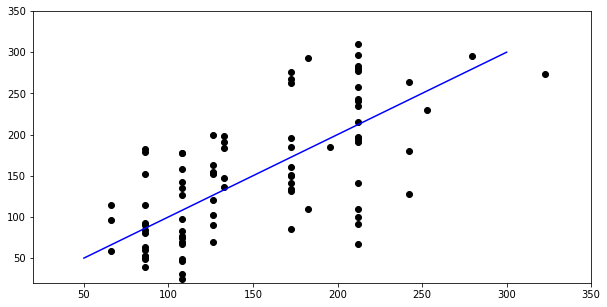

In [ ]:
plt.figure()
plt.scatter(y_pred,y_test,color='black') 
x = np.linspace(50,300,100)
y=x
plt.plot(x, y,color='blue')
plt.ylim(20, 350)
plt.xlim(20, 350)
plt.show()

Try experimenting with different max depth values for the regression trees. What do these results tell you about the limitations of using trees for regression problems?

In [ ]:
##Tree seems extremmely one sided!